<a href="https://colab.research.google.com/github/himanshusharma9034/Fabric-Defect-Detection-/blob/main/Fabric_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import h5py 
from tqdm import tqdm_notebook as tqdm
import random
from sklearn import preprocessing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Fabric Detection/Textile Defect detection/train32.csv')

In [5]:
import h5py

In [6]:
df.head()

,index,angle,indication_type,indication_value,split
0,48000,40,good,0,train
1,48001,60,good,0,train
2,48002,20,good,0,train
3,48003,40,good,0,train
4,48004,20,good,0,train


In [7]:
f = h5py.File('/content/drive/MyDrive/Fabric Detection/Textile Defect detection/matchingtDATASET_test_32.h5', 'r')

In [8]:
f.keys()

<KeysViewHDF5 ['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']>

In [9]:
data=f['hole']['angle0']

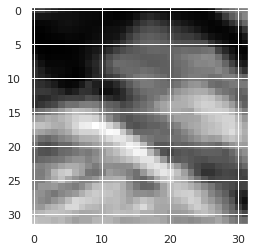

In [10]:
plt.imshow(data[0][0],cmap='gray')
f.close()

In [11]:
def getData(path):
    data=[]
    f=h5py.File(path, 'r')
    for label in tqdm(f.keys()):
        for angleKey in f[label].keys():
            for arr in f[label][angleKey]:
                data.append([arr[0],angleKey,label])
    f.close()
    return (data)
train_data=getData('/content/drive/MyDrive/Fabric Detection/Textile Defect detection/matchingtDATASET_train_32.h5')
test_data=getData('/content/drive/MyDrive/Fabric Detection/Textile Defect detection/matchingtDATASET_test_32.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

In [12]:
LE=preprocessing.LabelEncoder()
def splitData(data):
    random.shuffle(data)
    X=[]
    angleArr=[]
    y=[]
    for i in tqdm(data):
        image=i[0]
        angle=i[1]
        label=i[2]
        X.append(image.flatten())
        angleArr.append(angle)
        y.append(label)
    y=LE.fit_transform(y)
    return(X,y,angleArr)
X_train,y_train,angles_train=splitData(train_data)
X_test,y_test,angles_test=splitData(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

In [13]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [14]:
 import tensorflow as tf 
 tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.4794195389999913
GPU (s):
0.0368361629998617
GPU speedup over CPU: 67x


In [14]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11938783439437445766, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15703311680
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9642426795899827436
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [15]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_predict = clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62      6000
           1       0.17      0.21      0.19      6000
           2       0.39      0.54      0.45      6000
           3       0.20      0.21      0.21      6000
           4       0.51      0.44      0.47      6000
           5       0.45      0.36      0.40      6000

    accuracy                           0.38     36000
   macro avg       0.41      0.38      0.39     36000
weighted avg       0.41      0.38      0.39     36000



In [18]:
#display all the columns in the data set
pd.set_option('display.max_columns',None)

In [19]:
df.head()

,index,angle,indication_type,indication_value,split
0,48000,40,good,0,train
1,48001,60,good,0,train
2,48002,20,good,0,train
3,48003,40,good,0,train
4,48004,20,good,0,train


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             48000 non-null  int64 
 1   angle             48000 non-null  int64 
 2   indication_type   48000 non-null  object
 3   indication_value  48000 non-null  int64 
 4   split             48000 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


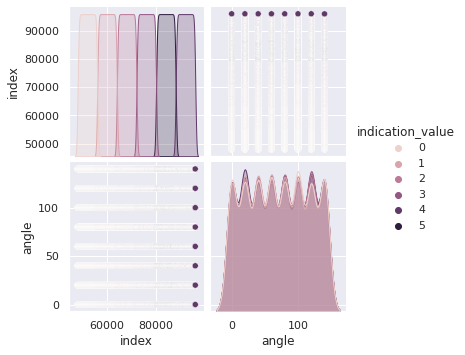

In [21]:
sns.pairplot(df,hue='indication_value')

In [22]:
df.shape

(48000, 5)

In [23]:
#check the null values
df.isnull().sum()

index               0
angle               0
indication_type     0
indication_value    0
split               0
dtype: int64

In [24]:
#check the count values
df.isnull().count()
#seems that there is no null values

index               48000
angle               48000
indication_type     48000
indication_value    48000
split               48000
dtype: int64

In [25]:
#check the dependent features output values
df['indication_value'].value_counts()

5    8000
4    8000
3    8000
2    8000
1    8000
0    8000
Name: indication_value, dtype: int64

In [26]:
##Independent and dependent features
X=df.drop("indication_value",axis=1)
y=df.indication_value

In [27]:
X["indication_type"].value_counts()

metal_contamination    8000
hole                   8000
thread                 8000
color                  8000
good                   8000
cut                    8000
Name: indication_type, dtype: int64

In [28]:
X = X.replace({"color": 0,"cut":1,"thread":2,"hole":3,"metal_contamination":4,"good":5})

In [29]:
X.head()

,index,angle,indication_type,split
0,48000,40,5,train
1,48001,60,5,train
2,48002,20,5,train
3,48003,40,5,train
4,48004,20,5,train


In [30]:
X.drop("split", axis=1,inplace=True)

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: indication_value, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
X_train.corr()

,index,angle,indication_type
index,1.000000,-0.004624,-0.028192
angle,-0.004624,1.000000,0.006427
indication_type,-0.028192,0.006427,1.000000


In [34]:
# #using Pearson Correlation(ranges between -1 to +1)
# plt.figure(figsize=(12,10))
# cor = X_train.corr()
# sns.heatmap(cor, annot=True,cmap=plt.cm.CMRmap_r)
# plt.show()

In [35]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr
# #abs is use to take both positive and negative values

In [36]:
# corr_features = correlation(X_train, 0.8)
# len(set(corr_features))

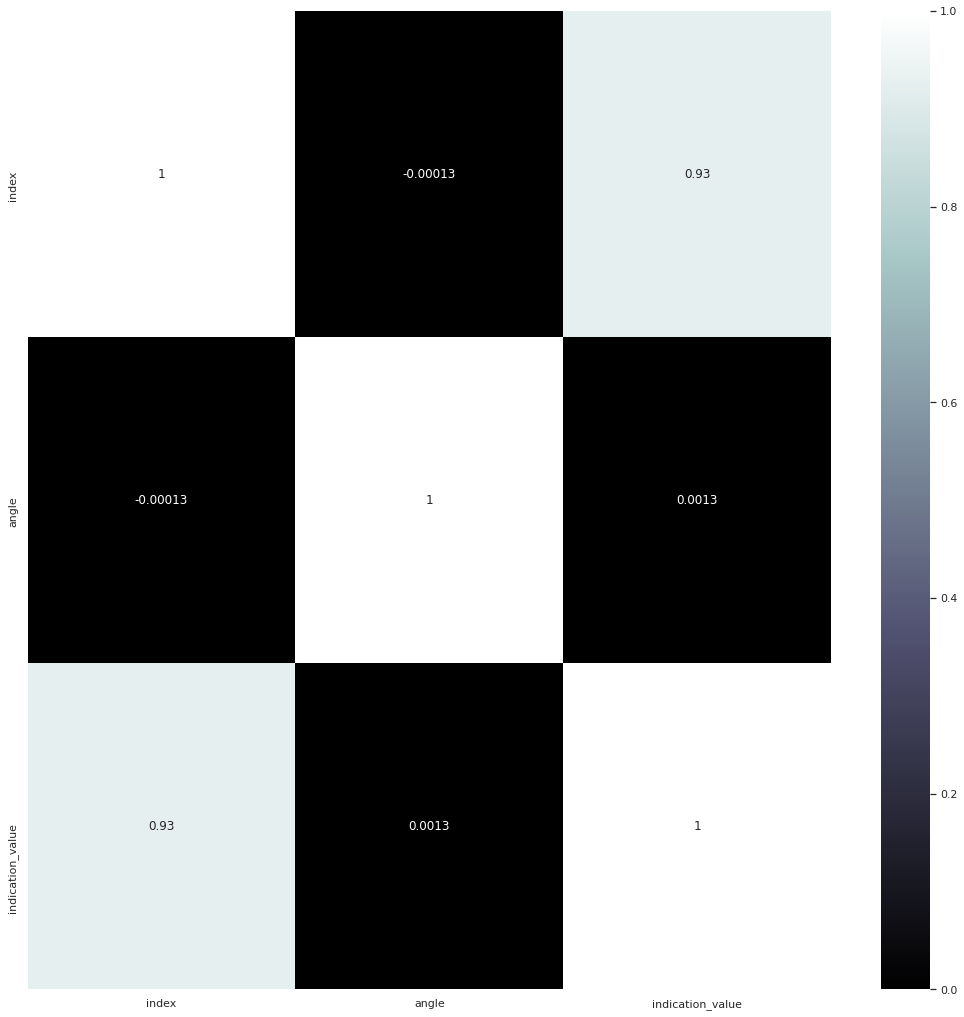

In [37]:
#Find Corelation between dependent and independent Features

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap = plt.cm.bone,)
plt.show()

<Figure size 2016x2016 with 0 Axes>

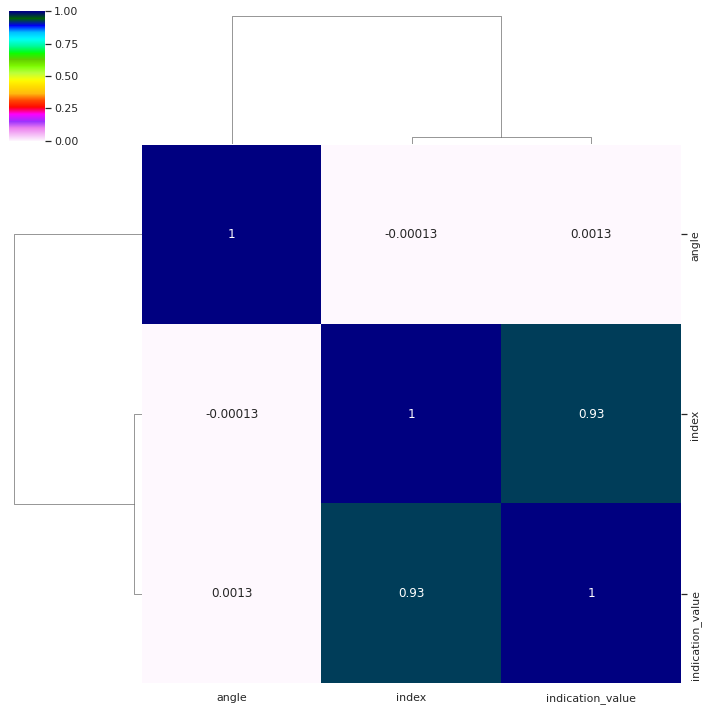

In [56]:
plt.figure(figsize=(28,28))
sns.clustermap(df.corr(), annot=True, cmap="gist_ncar_r")
plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesRegressor

In [59]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

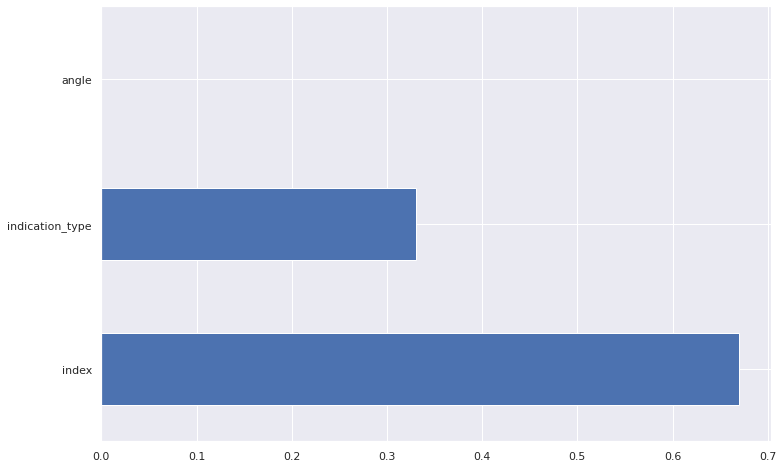

In [60]:
plt.figure(figsize= (12,8))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_train,y_train)

0.9999976045730705

In [64]:
reg_rf.score(X_test,y_test)

0.9999933998434147

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


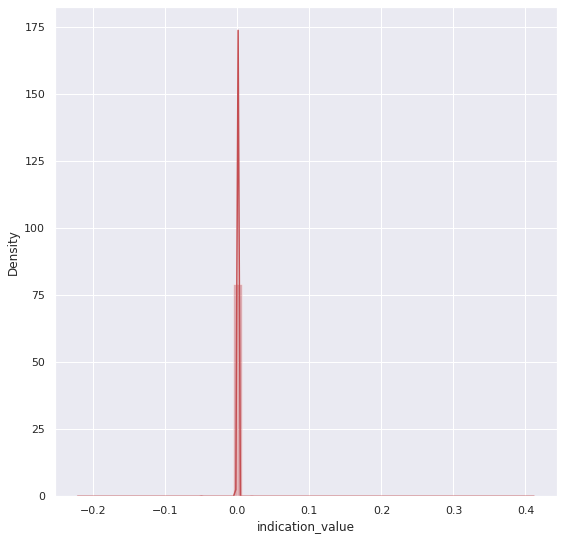

In [65]:
plt.figure(figsize=(9,9))
sns.distplot(y_test-y_pred,color='r')
plt.show()

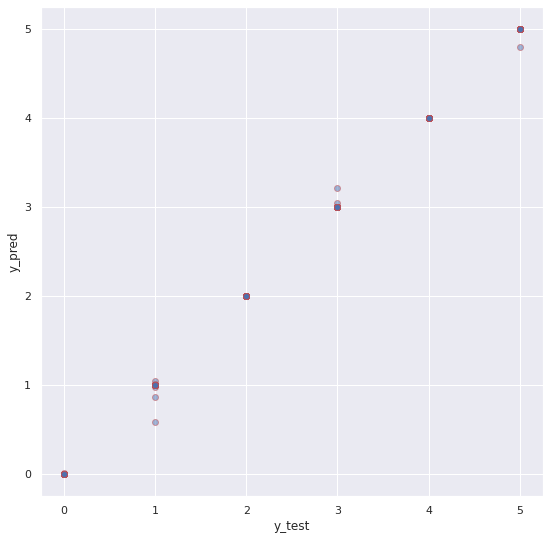

In [66]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,y_pred, alpha=0.5,cmap="r",edgecolors="r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics

In [68]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE 7.638888888888891e-05
MSE 1.937500000000001e-05
RMSE 0.004401704215414753


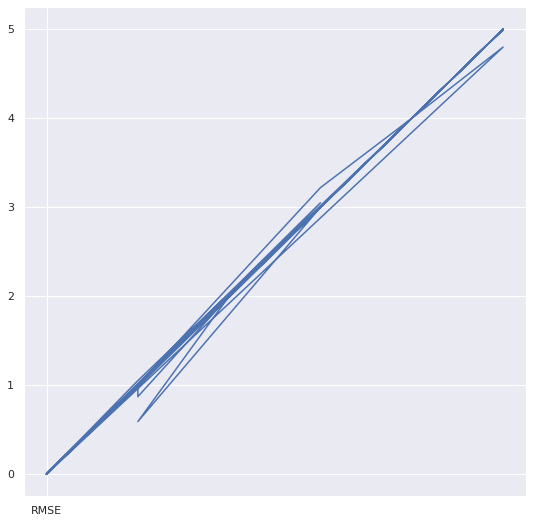

In [69]:
plt.figure(figsize=(9,9))
plt.plot(y_test,y_pred)
plt.plot(metrics.mean_squared_error(y_test,y_pred))
plt.plot('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred),))
# plt.plot('MAE',metrics.mean_absolute_error(y_test,y_pred))
#plt.tight_layout()
plt.show()

In [70]:
metrics.r2_score(y_test, y_pred)

0.9999933998434148

In [71]:
# Instantiation 
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 

In [72]:
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  


[00:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


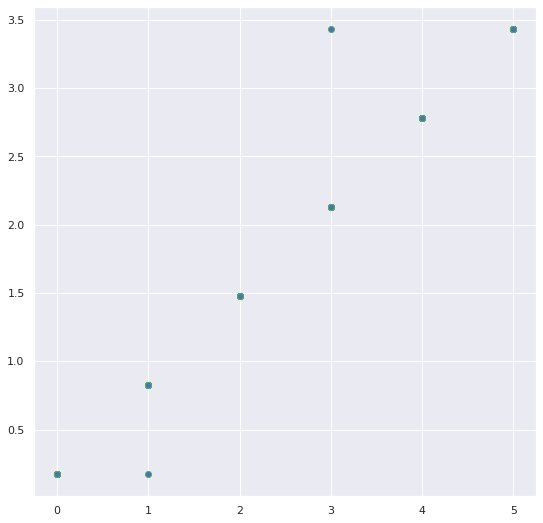

In [73]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,pred,edgecolors='g')

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
#print('ROC Accuracy', roc_auc_score(y_test,pred))

0.9913333333333334

In [75]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

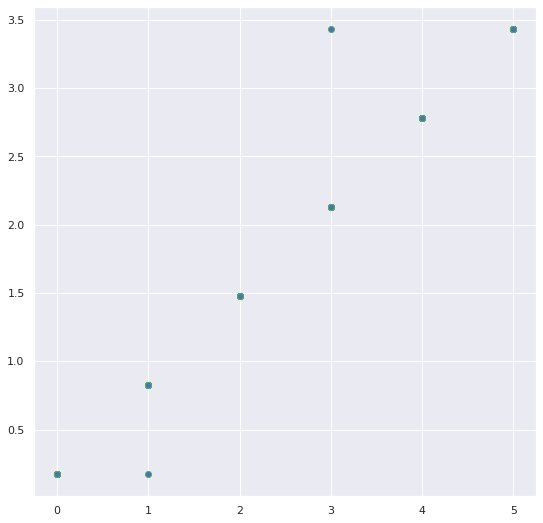

In [76]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,pred,edgecolors='g')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [39]:
linreg = LinearRegression()

In [40]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# fitting naive bayes to the training set 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
  
classifier = GaussianNB(); 
classifier.fit(X_train, y_train) 
  
# predicting test set results 
y_pred = classifier.predict(X_test) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[2418,    0,    0,    0,    0,    0],
       [   0, 2426,    0,    0,    0,    0],
       [   0,    0, 2392,    0,    0,    0],
       [   0,    0,    0, 2350,    0,    0],
       [   0,    0,    0,    0, 2393,    0],
       [   0,    0,    0,    0,    0, 2421]])

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


NameError: ignored

<Figure size 648x648 with 0 Axes>

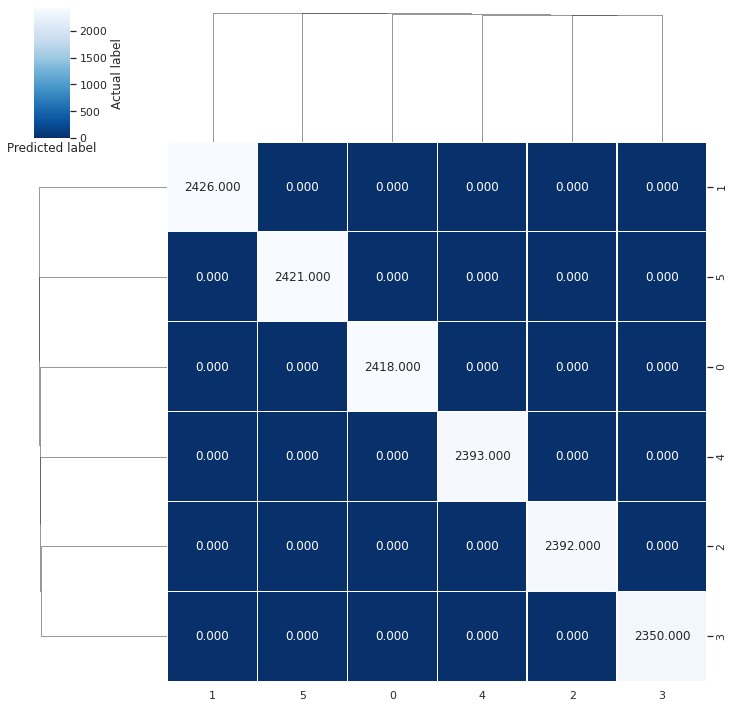

In [86]:
plt.figure(figsize=(9,9))
sns.clustermap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: ignored

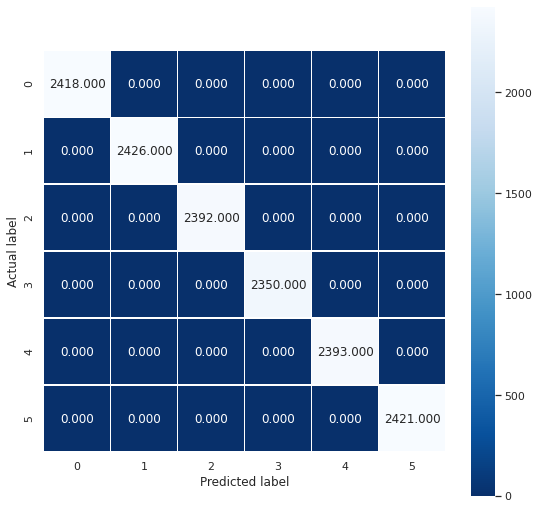

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

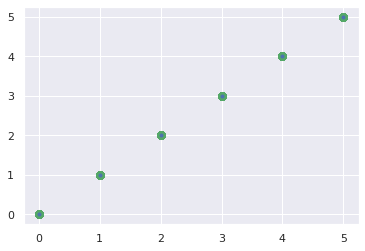

In [80]:
plt.scatter(y_test,y_pred,linewidths=-2,cmap="fre",edgecolors='g')

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [82]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)
knn_predictions = knn_clf.predict(X_test)
print('Accuracy of the knn algorithm is : {}'.format(accuracy_score(y_test,knn_predictions)))

Accuracy of the knn algorithm is : 0.9995138888888889


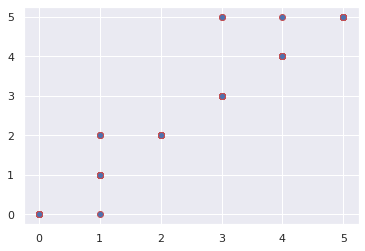

In [83]:
plt.scatter(y_test,knn_predictions,edgecolors='r')

In [84]:
confusion_matrix(y_test, knn_predictions)

array([[2418,    0,    0,    0,    0,    0],
       [   1, 2422,    3,    0,    0,    0],
       [   0,    0, 2392,    0,    0,    0],
       [   0,    0,    0, 2348,    0,    2],
       [   0,    0,    0,    0, 2392,    1],
       [   0,    0,    0,    0,    0, 2421]])

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
model = linear_model.LinearRegression()

In [46]:
#Bulid training model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Apply trained model to make prediction(on test data set)
y_predict = model.predict(X_test)

In [48]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)
print("Mean Squared error(MSE):%.2f"
     % mean_squared_error(y_test,y_predict))
print('Cofficient of determination (R^2): %.2f'
     %r2_score(y_test, y_predict))

Coefficients: [1.14963113e-04 2.80658267e-05 1.11752584e-01]
Intercept: -6.0598028563237545
Mean Squared error(MSE):0.36
Cofficient of determination (R^2): 0.88


In [49]:
#stream Formating
r2_score(y_test,y_predict)

0.8761993096259503

In [50]:
r2_score(y_test,y_predict).dtype

dtype('float64')

In [51]:
y_test.array

<PandasArray>
[5, 4, 5, 1, 1, 2, 1, 0, 0, 5,
 ...
 1, 3, 3, 1, 2, 2, 0, 5, 5, 0]
Length: 14400, dtype: int64

In [52]:
y_predict

array([4.2724597 , 4.96621125, 3.76422128, ..., 3.86882421, 3.68736495,
       0.08718854])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


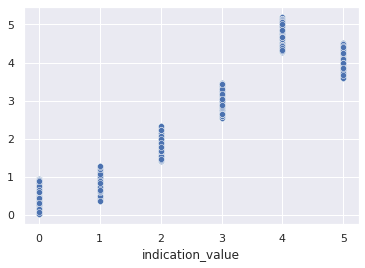

In [54]:
sns.scatterplot(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


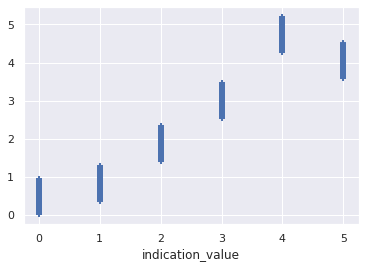

In [55]:
sns.scatterplot(y_test, y_predict, marker="+",alpha=1)